In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv("data.csv")

df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,"3,058,431,658.25"
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,"2,972,782,699.76"
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,"2,611,498,652.63"
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,"2,547,475,510.49"
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,"2,057,631,891.60"


In [38]:
# rename columns Reglement to amount
df.rename(columns={'Règlement': 'amount'}, inplace=True)

In [39]:
df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,amount
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,"3,058,431,658.25"
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,"2,972,782,699.76"
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,"2,611,498,652.63"
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,"2,547,475,510.49"
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,"2,057,631,891.60"


In [40]:
# check unique values for some columns
print(df['Branche'].unique())

print(df['Code Produit'].unique())

print(df['Sous-Branche'].unique())

print(len(df['Désignation Produit'].unique()))

['Risques Industriels']
['IN' 'RG' 'PE' 'IM' 'MH' 'VM' 'RN' 'IS' 'MP' 'BG' 'MI' 'DE' 'RP' 'VC'
 'CN' 'RR' 'CM']
['Incendie' 'Responsabilité Civile' 'Risque simple' 'CAT-NAT']
17


In [41]:
# check missing values
print(df.isnull().sum())

Exercice               0
Branche                0
Code Produit           0
Désignation Produit    0
Sous-Branche           0
Date Survenance        0
amount                 0
dtype: int64


In [42]:
# Convert columns to proper data types
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"], format="%d/%m/%Y")
df['amount'] = df['amount'].astype(str).str.strip()  # Ensure string type and strip spaces
df['amount'] = df['amount'].str.replace(',', '', regex=True)  # Remove commas
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convert to float safely


# Extract "Occurrence Year" and "Development Year"
df["Occurrence Year"] = df["Date Survenance"].dt.year
df["Development Year"] = df["Exercice"] - df["Occurrence Year"]

Development Year: 16
["Perte D'exploitation  " 'Incendie Risques Annexes ' 'RC Générale  ']

Development Year: 19
['RC Générale  ' 'Incendie Risques Annexes '
 'Multirisques Professionnelles  ']

Development Year: 18
['Incendie Risques Annexes ' 'RC Générale  ' 'RC Professionnelle  ']

Development Year: 17
['Incendie Risques Annexes ' 'RC Générale  ']

Development Year: 15
['Incendie Risques Annexes ' 'RC Générale  '
 'Multirisques Professionnelles  ' 'RC Professionnelle  ']

Development Year: 25
['Multirisques Professionnelles  ']

Development Year: 21
['Multirisques Professionnelles  ']

Development Year: 20
['RC Générale  ']



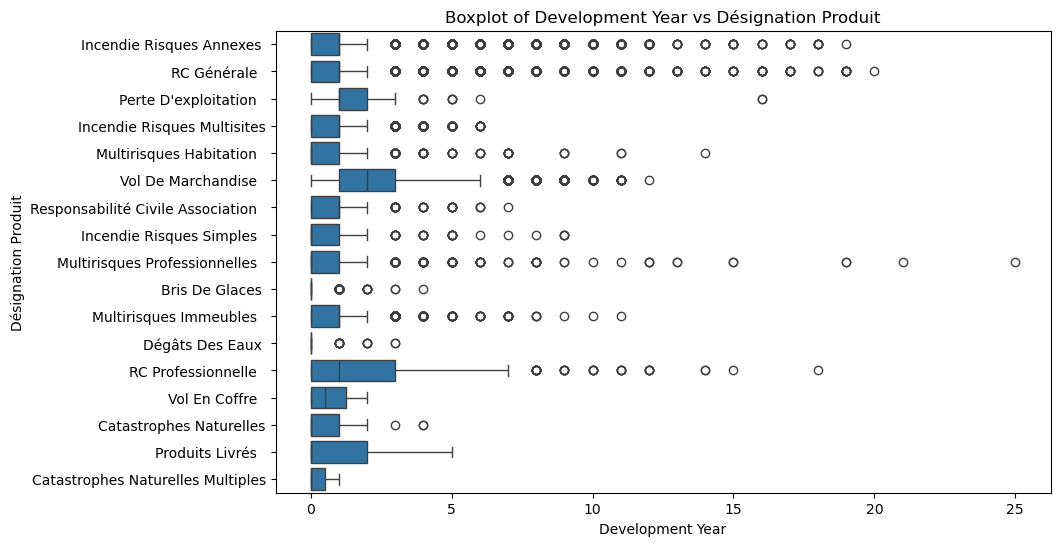

In [15]:
# for each value of development year, print its unique Code Produit values
for dev_year in df["Development Year"].unique():
    if dev_year < 15:
        continue
    print(f"Development Year: {dev_year}")
    print(df[df["Development Year"] == dev_year]["Désignation Produit"].unique())
    print()
    
# plot the relationship between dev year and designation produit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Development Year", y="Désignation Produit", data=df)
plt.title("Boxplot of Development Year vs Désignation Produit")
plt.show()


In [ ]:
# remove rows with occurence year < 2014
df2 = df[df["Occurrence Year"] >= 2014]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Development Year", y="Désignation Produit", data=df2)
plt.title("Boxplot of Development Year vs Désignation Produit")
plt.show()


In [ ]:


# Aggregate claim settlements by Occurrence Year and Development Year
run_off_triangle = df.pivot_table(
    index="Occurrence Year", 
    columns="Development Year", 
    values="amount", 
    aggfunc="sum"
).fillna(0)  # Fill missing values with 0 (no settlement yet)

# Display the Run-Off Triangle
print(run_off_triangle)

# export to csv
run_off_triangle.to_csv("run_off_triangle.csv")

In [ ]:
# visualise the run off triangle
plt.figure(figsize=(10, 6))
sns.heatmap(run_off_triangle, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Run-Off Triangle")
plt.show()


### Predicting Missing values in the upper triangular matrix

***Bayesian Inference (MCMC) for Missing Claims***

In [ ]:
# import pymc3 as pm
# import numpy as np

# # Convert run-off triangle to NumPy array
# triangle_array = run_off_triangle.values

# # Identify missing values (zeros)
# missing_positions = np.where(triangle_array == 0)

# # Prior distribution: Assume missing claims follow a normal distribution
# with pm.Model() as bayesian_model:
#     prior = pm.Normal("missing_claims", mu=np.mean(triangle_array[triangle_array > 0]), sigma=np.std(triangle_array[triangle_array > 0]))
    
#     # Likelihood: Missing values should follow the observed claims pattern
#     likelihood = pm.Normal("observed_claims", mu=prior, sigma=np.std(triangle_array[triangle_array > 0]), observed=triangle_array[triangle_array > 0])
    
#     # Perform Bayesian inference
#     trace = pm.sample(1000, return_inferencedata=True)

# # Replace missing values with Bayesian estimates
# predicted_values = trace.posterior["missing_claims"].mean().values
# for idx, (row, col) in enumerate(zip(missing_positions[0], missing_positions[1])):
#     triangle_array[row, col] = predicted_values[idx]

# # Convert back to DataFrame
# run_off_triangle_filled = pd.DataFrame(triangle_array, index=run_off_triangle.index, columns=run_off_triangle.columns)


***Gaussian Process Regression for Trend-Based Estimation***

In [ ]:
# import torch
# import torch.nn as nn

# # Define Transformer model
# class ClaimTransformer(nn.Module):
#     def __init__(self, input_size, hidden_dim, output_size):
#         super(ClaimTransformer, self).__init__()
#         self.encoder = nn.TransformerEncoderLayer(d_model=input_size, nhead=4)
#         self.fc = nn.Linear(input_size, output_size)

#     def forward(self, x):
#         x = self.encoder(x)
#         return self.fc(x)

# # Convert run-off triangle to tensor
# triangle_tensor = torch.tensor(run_off_triangle.values, dtype=torch.float32)

# # Initialize model
# model = ClaimTransformer(input_size=triangle_tensor.shape[1], hidden_dim=32, output_size=triangle_tensor.shape[1])

# # Train model on known values...
# # Then use it to predict missing values.


***Probabilistic Matrix Factorization (Collaborative Filtering for Claims Data)***

In [ ]:
# from surprise import SVD, Dataset, Reader

# # Prepare dataset for collaborative filtering
# reader = Reader(rating_scale=(run_off_triangle.min().min(), run_off_triangle.max().max()))
# data = Dataset.load_from_df(run_off_triangle.stack().reset_index(), reader)

# # Train SVD model
# svd = SVD()
# trainset = data.build_full_trainset()
# svd.fit(trainset)

# # Predict missing values
# for i in range(run_off_triangle.shape[0]):
#     for j in range(run_off_triangle.shape[1]):
#         if run_off_triangle.iloc[i, j] == 0:
#             run_off_triangle.iloc[i, j] = svd.predict(i, j).est


***Autoencoder-Based Data Imputation***


In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense

# # Define autoencoder architecture
# input_layer = Input(shape=(run_off_triangle.shape[1],))
# encoded = Dense(16, activation='relu')(input_layer)
# decoded = Dense(run_off_triangle.shape[1], activation='linear')(encoded)

# autoencoder = Model(input_layer, decoded)
# autoencoder.compile(optimizer='adam', loss='mse')

# # Train autoencoder on non-missing data
# non_missing_data = run_off_triangle[run_off_triangle > 0].fillna(0).values
# autoencoder.fit(non_missing_data, non_missing_data, epochs=100, batch_size=10)

# # Predict missing values
# predicted_values = autoencoder.predict(run_off_triangle.fillna(0).values)
# run_off_triangle_filled = pd.DataFrame(predicted_values, index=run_off_triangle.index, columns=run_off_triangle.columns)

# # Save the filled Run-Off Triangle to CSV
# run_off_triangle_filled.to_csv("run_off_triangle_filled_autoencoder.csv")

# # Print the updated matrix
# print(run_off_triangle_filled)


***Gaussian Process Regression for Trend-Based Estimation***

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Prepare dataset for GP model
X_train, y_train = [], []
for i in range(run_off_triangle.shape[0]):
    for j in range(run_off_triangle.shape[1]):
        if run_off_triangle.iloc[i, j] > 0:  # Use known values only
            X_train.append([i, j])
            y_train.append(run_off_triangle.iloc[i, j])

# Define Gaussian Process kernel (RBF for smooth trends)
kernel = RBF(length_scale=2.0) + WhiteKernel(noise_level=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train model on known claims
gp.fit(X_train, y_train)

# Predict missing values
for i in range(run_off_triangle.shape[0]):
    for j in range(run_off_triangle.shape[1]):
        if run_off_triangle.iloc[i, j] == 0:
            run_off_triangle.iloc[i, j] = gp.predict([[i, j]])[0]


# Save the filled Run-Off Triangle to CSV
run_off_triangle.to_csv("run_off_triangle_filled_gaussian.csv")

# Print the updated matrix
print(run_off_triangle)


***Gaussian Process with Local Variance (Instead of Global Mean)***

In [ ]:
# Group data into decades
grouped_gp_models = {}
for decade in range(1990, 2020, 10):  # Example: 1990s, 2000s, 2010s
    X_train_decade = []
    y_train_decade = []

    for i in range(run_off_triangle.shape[0]):
        for j in range(run_off_triangle.shape[1]):
            if run_off_triangle.iloc[i, j] > 0 and run_off_triangle.index[i] >= decade and run_off_triangle.index[i] < decade + 10:
                X_train_decade.append([i, j])
                y_train_decade.append(run_off_triangle.iloc[i, j])
    
    # Fit GPR separately for each decade
    if len(X_train_decade) > 5:  # Ensure enough data
        kernel = RBF(length_scale=2.5) + WhiteKernel(noise_level=0.5)  # More flexible kernel
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5)
        gp.fit(X_train_decade, y_train_decade)
        grouped_gp_models[decade] = gp

# Predict missing values using the appropriate GPR model
for i in range(run_off_triangle.shape[0]):
    for j in range(run_off_triangle.shape[1]):
        if run_off_triangle.iloc[i, j] == 0:
            decade = (run_off_triangle.index[i] // 10) * 10  # Determine which model to use
            if decade in grouped_gp_models:
                run_off_triangle.iloc[i, j] = grouped_gp_models[decade].predict([[i, j]])[0]
print(run_off_triangle)

# This is a checkpoint

In [43]:


# Aggregate claim settlements by Occurrence Year and Development Year
run_off_triangle = df.pivot_table(
    index="Occurrence Year", 
    columns="Development Year", 
    values="amount", 
    aggfunc="sum"
).fillna(0)  # Fill missing values with 0 (no settlement yet)

run_off_triangle = run_off_triangle[run_off_triangle.index >= 2014]
# Display the Run-Off Triangle
print(run_off_triangle)

# export to csv
run_off_triangle.to_csv("run_off_triangle.csv")


Development Year            0             1             2             3   \
Occurrence Year                                                            
2014              2.714988e+08  1.492500e+09  4.059528e+08  6.649640e+08   
2015              1.884429e+09  2.876935e+09  2.893737e+09  3.997651e+08   
2016              2.350275e+08  8.291096e+08  2.395051e+08  1.549431e+08   
2017              1.355774e+09  3.334419e+09  3.350317e+09  3.472412e+08   
2018              3.120300e+08  7.949720e+08  8.688508e+08  4.350555e+08   
2019              3.113907e+08  1.769238e+09  3.663016e+09  3.395674e+08   
2020              2.743859e+08  4.581547e+08  4.467660e+08  1.362108e+08   
2021              1.422131e+09  2.606994e+09  5.022379e+09  0.000000e+00   
2022              5.621894e+08  1.271713e+09  0.000000e+00  0.000000e+00   
2023              3.091934e+08  0.000000e+00  0.000000e+00  0.000000e+00   

Development Year            4             5             6             7   \
Occurrence 

In [44]:
print(run_off_triangle)

Development Year            0             1             2             3   \
Occurrence Year                                                            
2014              2.714988e+08  1.492500e+09  4.059528e+08  6.649640e+08   
2015              1.884429e+09  2.876935e+09  2.893737e+09  3.997651e+08   
2016              2.350275e+08  8.291096e+08  2.395051e+08  1.549431e+08   
2017              1.355774e+09  3.334419e+09  3.350317e+09  3.472412e+08   
2018              3.120300e+08  7.949720e+08  8.688508e+08  4.350555e+08   
2019              3.113907e+08  1.769238e+09  3.663016e+09  3.395674e+08   
2020              2.743859e+08  4.581547e+08  4.467660e+08  1.362108e+08   
2021              1.422131e+09  2.606994e+09  5.022379e+09  0.000000e+00   
2022              5.621894e+08  1.271713e+09  0.000000e+00  0.000000e+00   
2023              3.091934e+08  0.000000e+00  0.000000e+00  0.000000e+00   

Development Year            4             5             6             7   \
Occurrence 

***prepare test dataset***

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
run_off_triangle = pd.read_csv("run_off_triangle.csv", index_col=0)

# Convert column names to integers (if they are stored as strings)
run_off_triangle.columns = run_off_triangle.columns.astype(int)

# Step 1: Select years for evaluation (latest years)
years_to_test = [2023, 2022]  # Adjust if needed
test_df = run_off_triangle.copy()
removed_values = {}

# Step 2: Remove last known values in selected years
for year in years_to_test:
    if year in run_off_triangle.index:
        # Ensure row index is treated correctly
        row_values = run_off_triangle.loc[year].values
        non_zero_cols = np.where(row_values > 0)[0]  # Identify known values

        if len(non_zero_cols) > 0:
            last_known_col = run_off_triangle.columns[non_zero_cols[-1]]  # Get actual column name

            # Store the removed value
            removed_values[(year, last_known_col)] = run_off_triangle.loc[year, last_known_col]

            # Set value to 0 in test_df
            test_df.loc[year, last_known_col] = 0  

# Save test dataset with missing values
test_df.to_csv("run_off_triangle_test.csv")

# Save removed values for evaluation
removed_df = pd.DataFrame(removed_values.items(), columns=["Index", "Actual_Value"])
removed_df[["Year", "Development_Year"]] = pd.DataFrame(removed_df["Index"].tolist(), index=removed_df.index)
removed_df.drop(columns=["Index"], inplace=True)
removed_df.to_csv("run_off_triangle_removed_values.csv", index=False)

print("✅ Last known values removed for evaluation. Ready for prediction!")


✅ Last known values removed for evaluation. Ready for prediction!


***Generalized Additive Model (GAM) + Variance Adjustment to predict missing values***

In [46]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s

# Step 1: Convert test data to long format (for GAM training)
long_format_data = []
for year in test_df.index:  # Use actual occurrence years
    for dev_year in test_df.columns:  # Use actual development years
        long_format_data.append([year, dev_year, test_df.loc[year, dev_year]])

# Create DataFrame
df_long = pd.DataFrame(long_format_data, columns=['Occurrence_Year', 'Development_Year', 'Claim_Amount'])

# Step 2: Filter known values (remove zero claims that are placeholders)
df_known = df_long[df_long['Claim_Amount'] > 0]

# Step 3: Define and train the GAM model
gam = LinearGAM(s(0) + s(1))  # s(0) = Occurrence Year, s(1) = Development Year
gam.fit(df_known[['Occurrence_Year', 'Development_Year']], df_known['Claim_Amount'])

# Step 4: Predict missing claims **only for removed rows (years_to_test)**
predictions = {}
for year in years_to_test:
    for dev_year in test_df.columns:  # Predict for all dev years
        predicted_value = gam.predict([[year, dev_year]])[0]

        # Add variance-adjusted noise to preserve claim variability
        std_dev = np.std(df_known['Claim_Amount'])
        random_variation = np.random.normal(0, 0.05 * std_dev)  # 5% of std deviation

        # Store prediction
        predictions[(year, dev_year)] = max(0, predicted_value + random_variation)  # Ensure non-negative values

# Step 5: Convert predictions to a DataFrame
predicted_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['Predicted_Amount'])
predicted_df.index = pd.MultiIndex.from_tuples(predicted_df.index, names=["Occurrence_Year", "Development_Year"])

# Step 6: Convert predictions to the same format as `removed_values`
predicted_matrix = predicted_df.unstack(level=-1)  # Convert back to triangle format
if isinstance(predicted_matrix.columns, pd.MultiIndex):  
    predicted_matrix.columns = predicted_matrix.columns.droplevel()  # Remove multi-index if necessary

# Save predictions
predicted_matrix.to_csv("run_off_triangle_predicted.csv")
print(predicted_matrix)


Development_Year   0    1    2    3    4    5    6    7    8    9   ...   13  \
Occurrence_Year                                                     ...        
2023              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

Development_Year   14   15   16   17   18            19            20  \
Occurrence_Year                                                         
2023              0.0  0.0  0.0  0.0  0.0  8.109464e+07  1.524160e+08   

Development_Year            21            25  
Occurrence_Year                               
2023              3.461566e+08  1.198627e+09  

[1 rows x 23 columns]


In [34]:
# # Define GAM Model: Smooth splines for Occurrence_Year and Development_Year
# gam = LinearGAM(s(0) + s(1))  # s(0) = Occurrence Year, s(1) = Development Year

# # Train the GAM model on known claim data
# gam.fit(df_known[['Occurrence_Year', 'Development_Year']], df_known['Claim_Amount'])

# # Step 3: Predict missing claims **only for removed rows (years_to_test)**
# predictions = {}
# for year in years_to_test:
#     for dev_year in test_df.columns:  # Predict for all dev years
#         predicted_value = gam.predict([[year, dev_year]])[0]

#         # Add variance-adjusted noise to preserve claim variability
#         std_dev = np.std(df_known['Claim_Amount'])
#         random_variation = np.random.normal(0, 0.05 * std_dev)  # 5% of std deviation

#         # Store prediction
#         predictions[(year, dev_year)] = predicted_value + random_variation

# # Convert predictions to a DataFrame
# predicted_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['Predicted_Amount'])
# predicted_df.index = pd.MultiIndex.from_tuples(predicted_df.index, names=["Occurrence_Year", "Development_Year"])

# # Convert predictions to the same format as `removed_values`
# predicted_matrix = predicted_df.unstack(level=-1)  # Convert back to triangle format
# predicted_matrix.columns = predicted_matrix.columns.droplevel()  # Remove multi-index

# # Save predictions
# predicted_matrix.to_csv("run_off_triangle_predicted.csv")
# print(predicted_matrix)

In [35]:

# Step 7: Evaluate the Model
actual_values = removed_values.stack()  # Convert actual removed values to long format
predicted_values = predicted_matrix.stack()  # Convert predicted values to long format

# Merge actual and predicted for comparison
evaluation_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

# Compute error metrics
mae = np.mean(np.abs(evaluation_df['Actual'] - evaluation_df['Predicted']))  # Mean Absolute Error
mse = np.mean((evaluation_df['Actual'] - evaluation_df['Predicted']) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Handle division by zero in MAPE
valid_mape = evaluation_df['Actual'] != 0  # Filter out zero values to avoid division by zero
if valid_mape.sum() > 0:
    mape = np.mean(np.abs((evaluation_df.loc[valid_mape, 'Actual'] - evaluation_df.loc[valid_mape, 'Predicted']) / evaluation_df.loc[valid_mape, 'Actual'])) * 100  # MAPE
else:
    mape = np.nan  # If all actual values are zero, return NaN

# Print results
print("Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Save evaluation results
evaluation_df.to_csv("run_off_triangle_evaluation.csv") 


AttributeError: 'dict' object has no attribute 'stack'

## Chain ladder method

In [28]:

# Aggregate claim settlements by Occurrence Year and Development Year
run_off_triangle = df.pivot_table(
    index="Occurrence Year", 
    columns="Development Year", 
    values="amount", 
    aggfunc="sum"
).fillna(0)  # Fill missing values with 0 (no settlement yet)

run_off_triangle = run_off_triangle[run_off_triangle.index >= 2014]
# Display the Run-Off Triangle
print(run_off_triangle)

# export to csv
run_off_triangle.to_csv("run_off_triangle.csv")


Development Year            0             1             2             3   \
Occurrence Year                                                            
2014              2.714988e+08  1.492500e+09  4.059528e+08  6.649640e+08   
2015              1.884429e+09  2.876935e+09  2.893737e+09  3.997651e+08   
2016              2.350275e+08  8.291096e+08  2.395051e+08  1.549431e+08   
2017              1.355774e+09  3.334419e+09  3.350317e+09  3.472412e+08   
2018              3.120300e+08  7.949720e+08  8.688508e+08  4.350555e+08   
2019              3.113907e+08  1.769238e+09  3.663016e+09  3.395674e+08   
2020              2.743859e+08  4.581547e+08  4.467660e+08  1.362108e+08   
2021              1.422131e+09  2.606994e+09  5.022379e+09  0.000000e+00   
2022              5.621894e+08  1.271713e+09  0.000000e+00  0.000000e+00   
2023              3.091934e+08  0.000000e+00  0.000000e+00  0.000000e+00   

Development Year            4             5             6             7   \
Occurrence 

In [29]:
# Keep only data from 2014 onwards
run_off_triangle = run_off_triangle[run_off_triangle.index >= 2014]

# Print available years to verify
print("Available Years:", run_off_triangle.index.tolist())

# Export to CSV
run_off_triangle.to_csv("run_off_triangle.csv")

# Step 2: Prepare Test Data
years_to_test = [2023]  # Adjust as needed

# Ensure only existing years are selected
years_to_test = [year for year in years_to_test if year in run_off_triangle.index]  # ✅ Fix: Remove missing years

# Ensure the index is integer type
run_off_triangle.index = run_off_triangle.index.astype(int)

# Create a copy of the run-off triangle excluding selected years
test_df = run_off_triangle.drop(index=years_to_test, errors='ignore')

# Store removed values for evaluation later
removed_values = run_off_triangle.reindex(years_to_test).copy()

# Save the modified test dataset
test_df.to_csv("run_off_triangle_test.csv")

# Step 3: Train and Predict using the Chain Ladder Method
triangle = np.array(test_df.fillna(0))  # Convert to numpy (ensure missing values are handled)

# Fit the Chain Ladder Model (Development Factors)
dev_factors = []
for j in range(triangle.shape[1] - 1):
    known_values = triangle[:, j][triangle[:, j] > 0]
    next_values = triangle[:, j + 1][triangle[:, j] > 0]
    
    if len(known_values) > 0:
        factor = np.sum(next_values) / np.sum(known_values)  # Calculate development factor
    else:
        factor = 1  # Default factor when no known values
    
    dev_factors.append(factor)

# Predict missing values
predictions = test_df.copy()
for j in range(1, predictions.shape[1]):  # Start from second column
    for i in range(predictions.shape[0]):
        if predictions.iloc[i, j] == 0:  # Only predict missing values
            predictions.iloc[i, j] = predictions.iloc[i, j - 1] * dev_factors[j - 1]  # Apply development factor

# Step 4: Evaluate the Model
if years_to_test:  # ✅ Fix: Only proceed if we have valid years for evaluation
    actual_values = removed_values.stack()  # Convert actual removed values to long format
    
    # Ensure predictions have the same years as `removed_values`
    predicted_values = predictions.reindex(years_to_test, fill_value=0).stack()  # ✅ Fix: Use `reindex()` safely

    # Merge actual and predicted for comparison
    evaluation_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})

    # Compute error metrics
    mae = np.mean(np.abs(evaluation_df['Actual'] - evaluation_df['Predicted']))  # Mean Absolute Error
    mse = np.mean((evaluation_df['Actual'] - evaluation_df['Predicted']) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error

    # Handle division by zero in MAPE
    valid_mape = evaluation_df['Actual'] != 0  # Filter out zero values to avoid division by zero
    if valid_mape.sum() > 0:
        mape = np.mean(np.abs((evaluation_df.loc[valid_mape, 'Actual'] - evaluation_df.loc[valid_mape, 'Predicted']) / evaluation_df.loc[valid_mape, 'Actual'])) * 100  # MAPE
    else:
        mape = np.nan  # If all actual values are zero, return NaN

    # Print results
    print("Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Save results
    predictions.to_csv("run_off_triangle_predicted_chain_ladder.csv")
    evaluation_df.to_csv("run_off_triangle_evaluation_chain_ladder.csv")
else:
    print("⚠️ No valid years found for evaluation. Check available years in the dataset.")

Available Years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Evaluation Metrics:
MAE: 13443193.27
MSE: 4156547242044050.00
RMSE: 64471290.06
MAPE: 100.00%
